# ADAMS - Mini Task 2

###  Group Name: YuBaRa
### Participants: Batuhan Ipekci 527060, Raiber Alkurdi 593158, Yuqi Guan 602006

## 1. Data Analysis

In [0]:
import pandas as pd
df = pd.read_csv('MC2.csv')
df_test = pd.read_csv('MC2test.csv')

In [0]:
# the shape of the training dataset 
import numpy as np
df.shape

(1099207, 11)

In [0]:
# the shape of the test dataset 
df_test.shape

(212849, 8)

In [0]:
df.head(5)

,Unnamed: 0,product_id,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,full_text
0,1,0983797706,Igniting Your True Purpose and Passion: A Busi...,5,0,0,N,This is an inspirational and insightful book t...,This is an inspirational and insightful book t...,This is an inspirational and insightful book t...
1,2,1423151283,The Duckling Gets a Cookie!? (Pigeon),5,0,0,N,Loved it!,My twins are 3 and they love the pigeon books!...,Loved it!. My twins are 3 and they love the pi...
2,3,1445604752,Spitfire Ace of Aces: The Wartime Story of Joh...,4,2,2,N,Engaging Account of the Combat Career of an RA...,"Back in 1964, I was introduced to 'Johnnie' Jo...",Engaging Account of the Combat Career of an RA...
3,4,0393057941,The Bread Bible,5,0,0,N,Great book for beginners,I disagree with those reviews that say this is...,Great book for beginners. I disagree with thos...
4,5,1608322858,Do It Well. Make It Fun.: The Key to Success i...,3,2,2,N,Left me wanting more,"Reading this book, I hoped to find more about ...","Left me wanting more. Reading this book, I hop..."


We remove the 2 rows where the review_body is null.

In [0]:
df = df[pd.notnull(df['review_body'])]

In [0]:
df.shape

(1099207, 10)

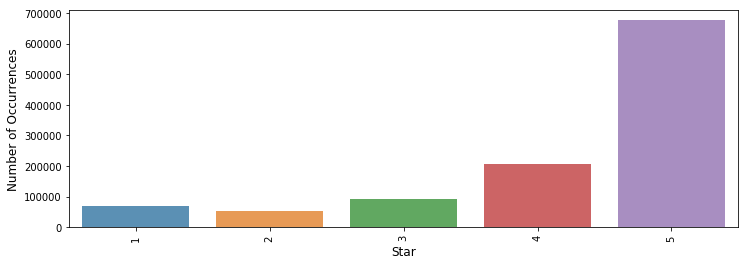

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
cnt_pro = df['star_rating'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Star', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [0]:
df['star_rating'].value_counts()

1099207

The classes are imbalanced, however, a naive classifier that predicts everything to be five star will only achieve over 61.5% accuracy.

Let’s have a look a few examples of reviews and its associated star rating.

In [0]:
def print_review(index):
    example = df[df.index == index][['review_body', 'star_rating']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Star:', example[1])
print_review(12)

Monster Zoo reads like a good animated movie. Maybe that's not right. It reads the way animated movies should be. It's got a good vision and has a heck of a good time with the cast of characters, even the ones turned evil. The drawings are fantastic and the story takes you straight from the beginning to the end with ease and speed. TenNapel is a good storyteller and I'm glad he tries to put out a graphic novel a year. I definitely recommend this, it's good for kids, adults and grown up kids. You'll like it.
Star: 5


In [0]:
print_review(832)

First Impressions: When Silence arrived for me to review, it made its way to the very top of my To-Read pile. I had been looking forward to this one ever since I feel in love with its gorgeous cover and its promise of a unique plot line. I haven't read too many books that contain necromancy and I was interested to see Michelle Sagara's take on that subject. Just from reading the synopsis, it also sounded like there would be a good contemporary story weaved in with the paranormal, which to me is a plus.<br /><br />First 50 Pages: I've always enjoyed Michelle Sagara's style of writing and Silence is just a good, if not better than her other books. Silence was a fast-paced book with a unique and interesting, darker then most plot line, a vast amount of characters, imaginative word play, and plenty of suspense that kept me entertained and on the edge of my seat. I loved how Michelle included an animal, Emma's Rottweiler, which I thought was charming and super cute since he even became of c

We combine the review_headline and review_body to process them together.


In [0]:
df['full_text'] = df["review_headline"].map(str)+ '. ' + df["review_body"]
df_test['full_text'] = df_test["review_headline"].map(str)+ '. ' + df_test["review_body"]

In [0]:
#getting the number of the word in the entier dataset 
df.index = range(1099207)
df['full_text'].apply(lambda x: len(x.split(' '))).sum()

190001457

In [0]:
reviews = df['full_text']
len(reviews)

1099207

## 2. Text Cleaning

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raibe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raibe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raibe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\raibe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

We defined a couple of functions which will help not only tokenizing the text but also engineering new features.

In [0]:
def sequence_length(text):
  ''' Calculates the length of the sequence '''
    return(len(text))

def capital_proportion(text):
   ''' Calculates the proportion of capital letters '''
    import re
    r = re.findall('([A-Z])', text)
    return(len(r) / len(text))

def char_cleaner(text, character_list):
  ''' Removes undesired characters '''
    for char in character_list:
        text = text.replace(char,'')
    return(text)

def negation_organizer(text):
  ''' Organizes some of the modal verbs '''

    text=text.replace('don\'t', 'do not' )
    text=text.replace('dont', 'do not' )

    text=text.replace('won\'t', 'will not' )
    text=text.replace('wont', 'will not' )

    text=text.replace('shouldn\'t', 'should not' )
    text=text.replace('shouldnt', 'should not' )

    text=text.replace('couldn\'t', 'could not' )
    text=text.replace('couldt', 'could not' )

    text=text.replace('haven\'t', 'have not' )
    text=text.replace('havent', 'have not' )

    text=text.replace('hadn\'t', 'had not' )
    text=text.replace('hadnt', 'had not' )

    text=text.replace('mustn\'t', 'must not' )
    text=text.replace('mustnt', 'must not' )

    text=text.replace('should\'ve', 'should have' )

    text=text.replace('can\'t', 'can not' )
    text=text.replace('cant', 'can not' )

    text=text.replace('might\'t', 'might not' )
    text=text.replace('might', 'may' )

    text=text.replace('I\'m', 'I am' )
    text=text.replace('Im', 'I am' )
    return(text)

def standardize_punctuation(text, punct):
  ''' Removes repeated punctuations, 
  i.e. returns '!' instead of '!!!!'  '''
    import re
    p = '\\' + punct +'+'
    if punct in text:
        text = re.sub(p, punct,text)

    return(text)

def referred_in(header, text):
  ''' Returns 1 if the name of the book is referred in 
  review_headline or review_body'''
    import nltk
    from nltk.corpus import stopwords
    stop_words = stopwords.words("english")

    header = nltk.word_tokenize(header)
    header = [word.lower() for word in header if word.isalpha()]
    header = [word for word in header if word not in stop_words]

    text = nltk.word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()] 
    text = [word for word in text if word not in stop_words]

    text_set = set(text)
    header_set = set(header)

    if len(header_set.intersection(text_set)) > 1:
        return(True)
    else:
        return(False)
    

def tokenize_named_entities(text): 
  
  ''' As there are many book characters / Author names/ places in the text body,
  we wanted not to lose them totally during word2vec process, and replaced
  all the words which are all small-letters followed by a capital letter with 
  the label 'namedentity'. We tried to exclude the sentence beginnings from this rule.
  '''
    import nltk
    sentences = nltk.sent_tokenize(text)
    w_list = []
    for sent in sentences:
        words = nltk.word_tokenize(sent) 
        for index,token in enumerate(words):
            if index > 0 and len(re.findall(r'([A-Z])', token)) == 1 and len(token) >1:
                w_list.append('namedentity')
            else:
                if token != '.':
                    if '.' in token and len(re.findall(r'([A-Z])', token)) > 0:
                        w_list.append('namedentity')
                    else:
                        w_list.append(token.lower().replace('.',''))
    return(w_list)

def tokenize(text):
  '''
  Applies usual tokenization
  '''
    import nltk
    words = nltk.word_tokenize(text) 
    words = [token.lower() for token in words]
    return(words)


def stopwords_organizer(text):
   ''' Custom stopwords, excluding negations  '''
    from nltk.corpus import stopwords
    stop_words = stopwords.words("english")
    stop_words_custom = [word for word in  stop_words if word not in ['what', 'why','how',
                                                    'such', 'no', 'nor', 
                                                    'not','only', 'more',
                                                    'too', 'very','just',
                                                    'can','should','will',
                                                    'when']]
    stop_words_custom.append('br')
    stop_words_custom.append('us')

    text = [word for word in text if word not in stop_words_custom and (word.isalpha() or word in ['!','?'])]
    return(text)

# Lemmatize with POS Tag


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize(text):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text]
    return(text)

In [0]:
import re
from bs4 import BeautifulSoup
prep = []
for index in range(0,  len(reviews)):
    if index % 1729 == 0:
        print(index)
    try:
        t0 = negation_organizer(reviews[index])
        t1 = BeautifulSoup(t0).get_text()
        t2 = standardize_punctuation(t1, '!')
        t3 = standardize_punctuation(t2 , '?')
        t4 = tokenize_named_entities(t3)
        t5 = stopwords_organizer(t4)
        t6 = lemmatize(t5)
        prep.append(t6)
    except:
        print(index,'. Exception occurred \n')

0
1729
3458
5187
6916
8645
10374
12103
13832
15561
17290
19019
20748
22477
24206
25935
27664
29393
31122
32851
34580
36309
38038
39767
41496
43225
44954
46683
48412
50141
51870
53599
55328
57057
58786
60515
62244
63973
65702
67431
69160
70889
72618
74347
76076
77805
79534
81263
82992
84721
86450
88179
89908
91637
93366
95095
96824
98553
100282
102011
103740


C:\Users\raibe\Anaconda3\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...... .... ..... ...... ... .... .. ....... ...... .... ........ ... .. . ....... ........ ...... ........... ... ...... ....... .... .. ........ ..... ...... .....'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


105469
107198
108927
110656
112385
114114
115843
117572
119301
121030
122759
124488
126217
127946
129675
131404
133133
134862
136591
138320
140049
141778
143507
145236
146965
148694
150423
152152
153881
155610
157339
159068
160797
162526
164255
165984
167713
169442
171171
172900
174629
176358
178087
179816
181545
183274
185003
186732
188461
190190
191919
193648
195377
197106
198835
200564
202293
204022
205751
207480
209209
210938
212667
214396
216125
217854
219583
221312
223041
224770
226499
228228
229957
231686
233415
235144
236873
238602
240331
242060
243789
245518
247247
248976
250705
252434
254163
255892
257621
259350
261079
262808
264537
266266
267995
269724
271453
273182
274911
276640
278369
280098
281827
283556
285285
287014
288743
290472
292201
293930
295659
297388
299117
300846
302575
304304
306033
307762
309491
311220
312949
314678
316407
318136
319865
321594
323323
325052
326781
328510
330239
331968
333697
335426
337155
338884
340613
342342
344071
345800
347529
349258
350987

In [0]:
import pickle
with open('train_prep_last.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(prep, f)

In [0]:
with open('train_prep_last.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    train_clean_reviews = pickle.load(f)

In [0]:
len(train_clean_reviews)

1099207

In [0]:
df["train_clean_reviews"] = train_clean_reviews

## 3. Word2vec Implementation

We decided to use Continuous Bag of Words (CBOW) following this StackOverflow discussion: https://stackoverflow.com/questions/38287772/cbow-v-s-skip-gram-why-invert-context-and-target-words

CBOW is argued to be faster and still good for frequent words.

The minimum count is 5, context window is 10, number of iterations is 300, and size is 100.

We saved it for later uses.

In [0]:
from gensim.models import Word2Vec    

# Train a Word2Vec model
word2vec_model = Word2Vec(prep, 
                 min_count=5,
                 window= 10,
                 iter = 300,
                 sg=0, # CBOW
                 size= 100)

filename = 'embedding_word2vec.txt'
word2vec_model.wv.save_word2vec_format(filename, binary = False)

In [0]:
EMBEDDING_DIM = 100

## 4. Data Downsampling

As we have seen previously, we have a class imbalance problem. We addressed this issue by downsampling our data. That means, we have taken stratified samples from each ranking levels, by the number of the least occurring star.

In [0]:
df['star_rating'].value_counts()

5    675733
4    208329
3     91574
1     69239
2     54332
Name: star_rating, dtype: int64

In [0]:
# Separate classes
df_star5 = df[df.star_rating == 5]
df_star4 = df[df.star_rating == 4]
df_star3 = df[df.star_rating == 3]
df_star2 = df[df.star_rating == 2] 
df_star1 = df[df.star_rating == 1]

In [0]:
from sklearn.utils import resample
# Downsample majority class
df_star5_downsampled = resample(df_star5, 
                                 replace=False,    # sample without replacement
                                 n_samples=54332,     # 54332 to match minority class
                                 random_state=123) # reproducible results
df_star4_downsampled = resample(df_star4, 
                                 replace=False,    # sample without replacement
                                 n_samples=54332,     # to match minority class
                                 random_state=54332) # reproducible results
df_star3_downsampled = resample(df_star3, 
                                 replace=False,    # sample without replacement
                                 n_samples=54332,     # to match minority class
                                 random_state=123) # reproducible results
df_star1_downsampled = resample(df_star1, 
                                 replace=False,    # sample without replacement
                                 n_samples=54332,     # to match minority class
                                 random_state=123) # reproducible results

df_star2_downsampled = resample(df_star2, 
                                 replace=False,    # sample without replacement
                                 n_samples=54332,     # to match minority class
                                 random_state=123) # reproducible results

In [0]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_star5_downsampled, df_star4_downsampled, df_star3_downsampled, df_star2_downsampled, df_star1_downsampled])
 
# Display new class counts
df_downsampled.star_rating.value_counts()

5    54332
4    54332
3    54332
2    54332
1    54332
Name: star_rating, dtype: int64

In [0]:
df_downsampled = df_downsampled.reset_index()
df_downsampled.head()

,index,Unnamed: 0,product_id,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,full_text,train_clean_reviews
0,290979,290980,0822333899,Continental Crossroads: Remapping U.S.-Mexico ...,5,0,1,Y,required reading,This book is required reading for a class I am...,required reading. This book is required readin...,"[require, reading, book, require, reading, cla..."
1,460378,460379,0976516527,Manion's German WWII Militaria Price Guide 200...,5,4,4,N,MANION'S GERMAN WORLD WAR II MILITARIA PRICE G...,MANION'S GERMAN WORLD WAR II MILITARIA PRICE G...,MANION'S GERMAN WORLD WAR II MILITARIA PRICE G...,"[manion, namedentity, german, world, war, ii, ..."
2,1087387,1087390,0375407359,The People's Tycoon: Henry Ford and the Americ...,5,8,8,N,"Thorough biography of complex, confounding Hen...","Henry Ford did not invent the automobile, but ...","Thorough biography of complex, confounding Hen...","[thorough, biography, complex, confound, named..."
3,995502,995504,1593373236,The Everything Meals For A Month Cookbook: Sma...,5,160,162,N,"Great, Practical Recipes",I have been playing around with the idea of OA...,"Great, Practical Recipes. I have been playing ...","[great, namedentity, namedentity, play, around..."
4,444005,444006,0312378750,Tell No Lies,5,3,4,N,Outstanding in every way,I read just about every legal thriller I can f...,Outstanding in every way. I read just about ev...,"[outstanding, every, way, read, just, every, l..."


In [0]:
df_downsampled.shape

(271660, 12)

 ## 5. Encoding the Target Variable

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(df_downsampled["star_rating"])
encoded_Y = encoder.transform(df_downsampled["star_rating"])

dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

## 6. Splitting the Data

In [0]:
from sklearn.model_selection import train_test_split

X = df_downsampled.loc[:,["product_title", "helpful_votes", "total_votes", "verified_purchase", "train_clean_reviews"]]
y = dummy_y.astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182012, 5)
(89648, 5)
(182012, 5)
(89648, 5)


We converted the reviews, which are a sequence of words to a numeric representation.

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(list(df_downsampled["train_clean_reviews"]))
seq=tokenizer_obj.texts_to_sequences(list(df_downsampled["train_clean_reviews"]))
seq[1]

[36349,
 1,
 7321,
 80,
 278,
 1112,
 32115,
 381,
 262,
 36349,
 1,
 7321,
 80,
 278,
 1112,
 32115,
 381,
 262,
 36349,
 1,
 1852,
 6185,
 510,
 359,
 8946,
 1017,
 51,
 1,
 1,
 1,
 1112,
 715,
 706,
 15,
 29,
 61,
 2557,
 385,
 1157,
 2423,
 3778,
 715,
 775,
 845,
 109,
 10166,
 15911,
 4806,
 122,
 21,
 1794,
 216,
 715,
 929,
 399,
 3442,
 1570,
 8689,
 3128,
 1562,
 36349,
 126,
 1078,
 779,
 33990,
 1118,
 32115,
 2605,
 8863,
 595,
 405,
 6009,
 2557,
 4579,
 1264,
 2330,
 1012,
 1517,
 174,
 595,
 6185,
 405,
 750,
 345,
 361,
 2114,
 706,
 467,
 539,
 591,
 2,
 65,
 17,
 57,
 595,
 405,
 948,
 1,
 1600,
 26341,
 1,
 1,
 725,
 4737,
 1,
 1,
 3422,
 1,
 13095,
 1,
 1922,
 1,
 706,
 1,
 2503,
 1,
 1054,
 2503,
 1,
 7,
 1,
 262,
 706,
 259,
 125,
 772,
 1118,
 151,
 10274,
 1887,
 4,
 13,
 1012,
 405,
 43,
 1485,
 1454,
 80148,
 1019,
 856,
 461,
 556,
 481,
 381,
 262,
 3,
 34,
 29,
 157,
 10,
 1475,
 238,
 2,
 15004,
 9172,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [0]:
longestsentence=max([len(s) for s in seq])
print(longestsentence)

4302


Some of our reviews are too long. We decided to cut our long reviews to 1500 words and pad our short reviews to 1500 to have a equal review length.

In [0]:
longestsentence = 1500

In [0]:
from keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(seq,longestsentence)

In [0]:
print('shape of review tensor: ', padded.shape)
print('shape of sentiment tensor: ', y.shape)

shape of review tensor:  (271660, 1500)
shape of sentiment tensor:  (271660, 5)


In [0]:
X_train_pad = padded[X_train.index]
X_test_pad = padded[X_test.index]

In [0]:
print('shape of X_train_pad: ', X_train_pad.shape)
print('shape of X_test_pad: ', X_test_pad.shape)
print('shape of y_train: ', y_train.shape)
print('shape of y_test: ', y_test.shape)

shape of X_train_pad:  (182012, 1500)
shape of X_test_pad:  (89648, 1500)
shape of y_train:  (182012, 5)
shape of y_test:  (89648, 5)


In [0]:
embeddings_index={}
with open("embedding_word2vec.txt") as loaded_embs:
    for line in loaded_embs:
        values=line.split()
        word=values[0]
        coefs=np.asarray(values[1:])
        embeddings_index[word]=coefs

In [0]:
word_index=tokenizer_obj.word_index
# here is the size of vocab/number of unique tokens
len(word_index)

173412

In [0]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

In [0]:
for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        #words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)
print(num_words)

(173413, 100)
173413


## 7. Dealing with constant features 

We organized our constant (non-text-sequence) features separately, then combined them later.

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
def process_constant_attributes(df, train, test):
    # initialize the column names of the continuous data
    continuous = ["helpful_votes", "total_votes"]
 
    # performin min-max scaling each continuous feature column to
    # the range [0, 1]
    cs = MinMaxScaler()
    trainContinuous = cs.fit_transform(train[continuous])
    testContinuous = cs.transform(test[continuous])
 
    # one-hot encode the categorical data (by definition of
    # one-hot encoding, all output features are now in the range [0, 1])
    zipBinarizer = LabelBinarizer().fit(df["verified_purchase"])
    trainCategorical = zipBinarizer.transform(train["verified_purchase"])
    testCategorical = zipBinarizer.transform(test["verified_purchase"])
 
    # construct our training and testing data points by concatenating
    # the categorical features with the continuous features
    trainX = np.hstack([trainCategorical, trainContinuous])
    testX = np.hstack([testCategorical, testContinuous])
 
    # return the concatenated training and testing data
    return (trainX, testX)

In [0]:
(trainAttrX, testAttrX) = process_constant_attributes(df_downsampled, X_train, X_test)

C:\Users\raibe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
trainAttrX.shape

(182012, 3)

In [0]:
testAttrX.shape

(89648, 3)

## 8. Modeling

## 8.1. LSTM + Word2Vec (trained)

This is the resulting architecture we came up with. The text goes through an LSTM layer, then meets with other (constant) features.

In [0]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense, GRU 
from keras.models import Sequential, Model
from keras.initializers import Constant


# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(longestsentence,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(num_words,EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=longestsentence, trainable=False)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

auxiliary_output = Dense(5, activation='softmax', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(3,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(5, activation='softmax', name='main_output')(x)

model = Model(inputs=[main_input, auxiliary_input], outputs= main_output)


model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 1500)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1500, 100)    17341300    main_input[0][0]                 
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 32)           17024       embedding_3[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 3)            0                                            
__________________________________________________________________________________________________
concatenat

In [0]:
model1 = model.fit([X_train_pad, trainAttrX], y_train, epochs=10, batch_size=128, validation_data=([X_test_pad, testAttrX], y_test), verbose=2)

Train on 182012 samples, validate on 89648 samples
Epoch 1/10
 - 1755s - loss: 1.3162 - acc: 0.4143 - val_loss: 1.1692 - val_acc: 0.4862
Epoch 2/10
 - 2070s - loss: 1.1344 - acc: 0.5038 - val_loss: 1.1117 - val_acc: 0.5122
Epoch 3/10
 - 1868s - loss: 1.0923 - acc: 0.5222 - val_loss: 1.0835 - val_acc: 0.5269
Epoch 4/10
 - 2119s - loss: 1.0694 - acc: 0.5330 - val_loss: 1.0721 - val_acc: 0.5320
Epoch 5/10
 - 2031s - loss: 1.0584 - acc: 0.5375 - val_loss: 1.4868 - val_acc: 0.3168
Epoch 6/10
 - 2376s - loss: 1.1102 - acc: 0.5120 - val_loss: 1.0927 - val_acc: 0.5211
Epoch 7/10
 - 2313s - loss: 1.0715 - acc: 0.5302 - val_loss: 1.0943 - val_acc: 0.5231
Epoch 8/10
 - 1999s - loss: 1.0684 - acc: 0.5322 - val_loss: 1.0744 - val_acc: 0.5291
Epoch 9/10
 - 1671s - loss: 1.0592 - acc: 0.5369 - val_loss: 1.0632 - val_acc: 0.5350
Epoch 10/10
 - 1677s - loss: 1.0713 - acc: 0.5331 - val_loss: 1.0898 - val_acc: 0.5250


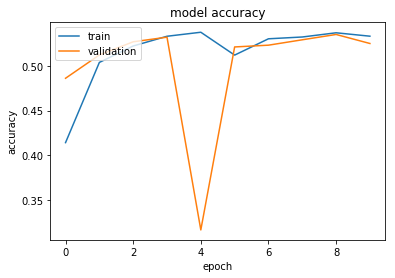

In [0]:
plt.plot(model1.history['acc'])
plt.plot(model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
score_emb = model.evaluate([X_test_pad, testAttrX], y_test, verbose=0)
print('Test loss:', score_emb[0])
print('Test accuracy:', score_emb[1])

Test loss: 1.0898305801819335
Test accuracy: 0.5249754595752275


### 8.2. LSTM + Embeddings
We tried the same model as above, but we allow this time for our embeddings to be tranied with the model and adjusted 

In [0]:
main_input = Input(shape=(longestsentence,), dtype='int32', name='main_input')

x = Embedding(num_words,EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=longestsentence, trainable=True)(main_input)

lstm_out = LSTM(32)(x)

auxiliary_output = Dense(5, activation='softmax', name='aux_output')(lstm_out)

auxiliary_input = Input(shape=(3,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

main_output = Dense(5, activation='softmax', name='main_output')(x)

model_trainable = Model(inputs=[main_input, auxiliary_input], outputs= main_output)

model_trainable.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Train on 182012 samples, validate on 89648 samples
Epoch 1/15
 - 2361s - loss: 1.3357 - acc: 0.4018 - val_loss: 1.1931 - val_acc: 0.4763
Epoch 2/15
 - 1953s - loss: 1.1737 - acc: 0.4854 - val_loss: 1.3094 - val_acc: 0.4192
Epoch 3/15
 - 1962s - loss: 1.1586 - acc: 0.4931 - val_loss: 1.1183 - val_acc: 0.5113
Epoch 4/15
 - 1957s - loss: 1.1018 - acc: 0.5198 - val_loss: 1.1071 - val_acc: 0.5167
Epoch 5/15
 - 1966s - loss: 1.0816 - acc: 0.5290 - val_loss: 1.0986 - val_acc: 0.5225
Epoch 6/15
 - 1968s - loss: 1.0604 - acc: 0.5384 - val_loss: 1.0899 - val_acc: 0.5237
Epoch 7/15
 - 1983s - loss: 1.0454 - acc: 0.5460 - val_loss: 1.0896 - val_acc: 0.5272
Epoch 8/15
 - 2024s - loss: 1.0331 - acc: 0.5514 - val_loss: 1.0822 - val_acc: 0.5309
Epoch 9/15
 - 2047s - loss: 1.0210 - acc: 0.5569 - val_loss: 1.0784 - val_acc: 0.5336
Epoch 10/15
 - 2079s - loss: 1.0093 - acc: 0.5623 - val_loss: 1.0778 - val_acc: 0.5348
Epoch 11/15
 - 2158s - loss: 0.9991 - acc: 0.5679 - val_loss: 1.0769 - val_acc: 0.5337
E

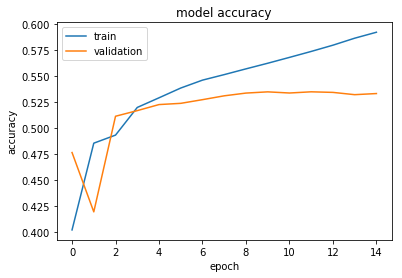

In [0]:
plt.plot(model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
score_emp2 = model_trainable.evaluate([X_test_pad, testAttrX], y_test, verbose=0)
print('Test accuracy:', score_emp2[1])


### 8.3. GRU (only Text)
We build a GRU model with only the text data and see what kind of results we get

In [0]:
model3=Sequential()
embedding_layer=Embedding(num_words, #size of vocab
                         EMBEDDING_DIM, #size of embedding 
                         embeddings_initializer=Constant(embedding_matrix),
                         input_length=longestsentence, 
                         trainable=True  
                         )
model3.add(embedding_layer)
model3.add(GRU(16))
model3.add(Dense(5, activation="softmax"))
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1500, 100)         17341300  
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                5616      
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 85        
Total params: 17,347,001
Trainable params: 17,347,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
h3 = model3.fit(X_train_pad, y_train, epochs=15, batch_size=1000, validation_data=(X_test_pad, y_test), verbose=2)

Train on 182012 samples, validate on 89648 samples
Epoch 1/15
 - 712s - loss: 1.6004 - acc: 0.2882 - val_loss: 1.5323 - val_acc: 0.3118
Epoch 2/15
 - 761s - loss: 1.4851 - acc: 0.3364 - val_loss: 1.4541 - val_acc: 0.3454
Epoch 3/15
 - 800s - loss: 1.4165 - acc: 0.3685 - val_loss: 1.3939 - val_acc: 0.3742
Epoch 4/15
 - 753s - loss: 1.3462 - acc: 0.3995 - val_loss: 1.3014 - val_acc: 0.4170
Epoch 5/15
 - 841s - loss: 1.2475 - acc: 0.4407 - val_loss: 1.2197 - val_acc: 0.4524
Epoch 6/15
 - 832s - loss: 1.1772 - acc: 0.4742 - val_loss: 1.1710 - val_acc: 0.4781
Epoch 7/15
 - 858s - loss: 1.1334 - acc: 0.4982 - val_loss: 1.1448 - val_acc: 0.4934
Epoch 8/15
 - 680s - loss: 1.1076 - acc: 0.5120 - val_loss: 1.1355 - val_acc: 0.5000
Epoch 9/15
 - 732s - loss: 1.0801 - acc: 0.5258 - val_loss: 1.1055 - val_acc: 0.5149
Epoch 10/15
 - 746s - loss: 1.0562 - acc: 0.5371 - val_loss: 1.1039 - val_acc: 0.5176
Epoch 11/15
 - 657s - loss: 1.0416 - acc: 0.5446 - val_loss: 1.0881 - val_acc: 0.5251
Epoch 12/15


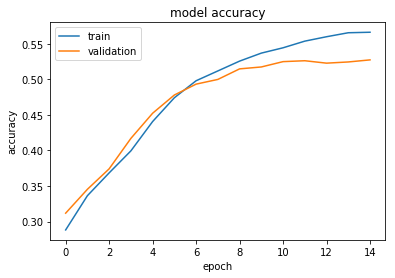

In [0]:
plt.plot(h3.history['acc'])
plt.plot(h3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
score_emp3 = model3.evaluate(X_test_pad, y_test, verbose=0)
print('Test loss:', score_emp3[0])
print('Test accuracy:', score_emp3[1])

Test loss: 1.0881033807104663
Test accuracy: 0.5275298946992683


## 9. Benchmarking

All the 3 models are close to each other, having accuracy around 0.53. 


We will now compare it with a Naive Bayes model to see if it is beating the simplest benchmark.

We use the previous embedding matrix to get the numbers manually, as we use them directly without wrapping inside Keras layers.

In [0]:
review_matrix = np.zeros((df_downsampled["train_clean_reviews"].shape[0], 
                          EMBEDDING_DIM))

for index,review in enumerate(list(df_downsampled["train_clean_reviews"])):
  word_vector = []
  for word in review:
    word_vector.append(embedding_matrix[word_index[word],:].astype('float32'))
  if (np.isnan(np.array(word_vector).mean(axis=0))).any() == False:
    review_matrix[index] = np.array(word_vector).mean(axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
from sklearn.model_selection import train_test_split

X = df.loc[:,[ 'helpful_votes',
                          'total_votes', 'verified_purchase',
                          'book_referred', 'capital_prop',
                          'seq_length','train_clean_reviews' ]]

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(review_matrix, 
                                                    encoded_Y,
                                                    test_size=0.33, random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler_tr = MinMaxScaler().fit(X_train_nb)
X_train_nb = scaler_tr.transform(X_train_nb)
X_test_nb = scaler_tr.transform(X_test_nb)

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_nb, y_train_nb.astype('str'))

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = nb.predict(X_test_nb) 

print('accuracy %s' % accuracy_score(y_pred, y_test_nb.astype('str')))


accuracy 0.35533419596644655


All of our 3 models beats the Naive Bayes benchmark, which has only 0.37 accuracy. Our best model hits around 0.53 accuracy, and we know that it requires a lot more epochs and more intensive tuning, i.e. using GridSearchCV or talos as we did in the last Mini Task. However, without a proper tuning, we can still beat the naive benchmark.

In [0]:
import pandas as pd 
results = {'Accuracy':[0.524,0.531,0.527, 0.355]}   
results = pd.DataFrame(results, index =['LSTM+Word2Vec', 'LSTM+Embedding', 'GRU(only text)', 'Naive Bayes']) 
results

,Accuracy
LSTM+Word2Vec,0.524
LSTM+Embedding,0.531
GRU(only text),0.527
Naive Bayes,0.355


# 10. Prediction 

### We will use the second model (LSTM + Embeddings) to make the prediction because it has the best accuracy and it is built based on both text and constant features

In [0]:
df_test.head(5)

,Unnamed: 0,product_id,product_title,helpful_votes,total_votes,verified_purchase,review_headline,review_body,full_text
0,1,1445604752,Spitfire Ace of Aces: The Wartime Story of Joh...,2,2,N,Engaging Account of the Combat Career of an RA...,"Back in 1964, I was introduced to 'Johnnie' Jo...",Engaging Account of the Combat Career of an RA...
1,2,080244864X,Hush: Moving From Silence to Healing After Chi...,1,1,N,Best Book Ever (Next to the Bible,This book has helped me through a lot this pas...,Best Book Ever (Next to the Bible. This book h...
2,3,0312536984,Eviction Notice: A Hood Rat Novel (Hood Rat No...,0,0,N,Wild and Crazy,A gripping read! K'wan is on fire with this n...,Wild and Crazy. A gripping read! K'wan is on ...
3,4,1609412427,Vegan Cooking for Carnivores: Over 125 Recipes...,87,90,Y,Cooking up a storm and loving it!,I love this book. I've had it about four days...,Cooking up a storm and loving it!. I love this...
4,5,0876059515,The Complete Book of Foaling: An Illustrated G...,1,1,N,The best foaling book on the market,As both a long-time horse owner and fulltime w...,The best foaling book on the market. As both a...


In [0]:
continuous = ["helpful_votes", "total_votes"]

cs = MinMaxScaler()
df_test_Continuous = cs.fit_transform(df_test[continuous])

zipBinarizer = LabelBinarizer().fit(df_test["verified_purchase"])
df_testCategorical = zipBinarizer.transform(df_test["verified_purchase"])

df_test_normalized = np.hstack([df_testCategorical, df_test_Continuous])


C:\Users\raibe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
df_test_normalized.shape

(212849, 3)

In [0]:
with open('test_prep_last.pickle', 'rb') as f:
    test_clean_reviews = pickle.load(f)

In [0]:
len(test_clean_reviews)

212849

In [0]:
df_test["test_clean_reviews"] = test_clean_reviews

In [0]:
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(list(df_test["test_clean_reviews"]))
seq=tokenizer_obj.texts_to_sequences(list(df_test["test_clean_reviews"]))
seq[1]

[75,
 1,
 1,
 1,
 1,
 2,
 65,
 79,
 245,
 3547,
 560,
 14100,
 257,
 167,
 252,
 8,
 2,
 1128,
 1493,
 29,
 41,
 74,
 45,
 81,
 45,
 49,
 3,
 98,
 5688,
 1011,
 70050,
 7308,
 70051,
 87,
 391,
 70052,
 22,
 50,
 85,
 2,
 6,
 1,
 2,
 65,
 147,
 1]

In [0]:
from keras.preprocessing.sequence import pad_sequences
padded=pad_sequences(seq,longestsentence)

In [0]:
y_prob = model_trainable.predict([padded,df_test_normalized]) 

In [0]:
y_prob

array([[0.0250785 , 0.0766449 , 0.26121637, 0.4254361 , 0.21162413],
       [0.43014333, 0.3325693 , 0.14656752, 0.04070976, 0.05001007],
       [0.45768863, 0.24817024, 0.13855575, 0.06600281, 0.08958252],
       ...,
       [0.04353473, 0.15004322, 0.34739003, 0.31944162, 0.1395904 ],
       [0.30414474, 0.32495838, 0.20055182, 0.08339712, 0.08694793],
       [0.70864284, 0.10132603, 0.05995393, 0.03656392, 0.09351325]],
      dtype=float32)

In [0]:
new_df_test = df_test[["product_id"]]

In [0]:
new_df_test.head(3)

,product_id,star_rating
0,1445604752,4
1,080244864X,1
2,0312536984,1


export_csv = new_df_test.to_csv(r'C:\Users\raibe\Desktop\MC2_YuBaRa.csv', index = None, header=True) 